In [1]:
! ipcluster start -n 5 --daemon

In [2]:
from ipyparallel import Client

rc = Client()

In [3]:
rc.ids

[0, 1, 2, 3, 4]

In [4]:
rc[:].apply_sync(lambda : "Hello, World")

['Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World']

In [5]:
dview = rc[:] # use all engines

In [6]:
serial_result = map(lambda x:x**10, range(32))

In [7]:
parallel_result = dview.map_sync(lambda x: x**10, range(32))

In [8]:
print (list(serial_result))

[0, 1, 1024, 59049, 1048576, 9765625, 60466176, 282475249, 1073741824, 3486784401, 10000000000, 25937424601, 61917364224, 137858491849, 289254654976, 576650390625, 1099511627776, 2015993900449, 3570467226624, 6131066257801, 10240000000000, 16679880978201, 26559922791424, 41426511213649, 63403380965376, 95367431640625, 141167095653376, 205891132094649, 296196766695424, 420707233300201, 590490000000000, 819628286980801]


In [9]:
parallel_result

[0,
 1,
 1024,
 59049,
 1048576,
 9765625,
 60466176,
 282475249,
 1073741824,
 3486784401,
 10000000000,
 25937424601,
 61917364224,
 137858491849,
 289254654976,
 576650390625,
 1099511627776,
 2015993900449,
 3570467226624,
 6131066257801,
 10240000000000,
 16679880978201,
 26559922791424,
 41426511213649,
 63403380965376,
 95367431640625,
 141167095653376,
 205891132094649,
 296196766695424,
 420707233300201,
 590490000000000,
 819628286980801]

In [10]:
list(serial_result) == parallel_result

False

In [11]:
view = rc[:]

In [12]:
view.activate()

In [13]:
view.run('psum.py')

<AsyncResult: execute>

In [14]:
import numpy as np
view.scatter('a', np.arange(16, dtype='float'))

<AsyncResult: scatter>

In [15]:
view['a']

[array([ 0.,  1.,  2.,  3.]),
 array([ 4.,  5.,  6.]),
 array([ 7.,  8.,  9.]),
 array([ 10.,  11.,  12.]),
 array([ 13.,  14.,  15.])]

In [16]:
%px print ('hi')

<AsyncResult: execute>

In [17]:
%pxresult

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi
[stdout:4] hi


In [20]:
with rc[:].sync_imports():
   ....:    import numpy

importing numpy on engine(s)


In [21]:
%px a = numpy.random.rand(2,2)

<AsyncResult: execute>

In [22]:
%px numpy.linalg.eigvals(a)

<AsyncResult: execute>

In [23]:
%pxresult

Out[0:3]: array([ 0.09356773,  1.05141208])

Out[1:3]: array([ 0.89738215,  0.07518525])

Out[2:3]: array([ 1.15900812, -0.08775433])

Out[3:3]: array([ 0.60587246, -0.22164754])

Out[4:3]: array([ 0.17261418,  1.02669843])

In [24]:
%px %pylab inline

<AsyncResult: execute>

In [25]:
%px plot(rand(100))

<AsyncResult: execute>

[output:0]

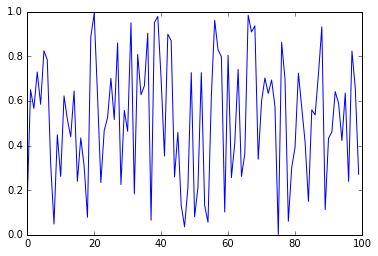

[output:1]

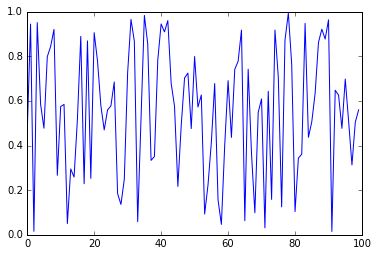

[output:2]

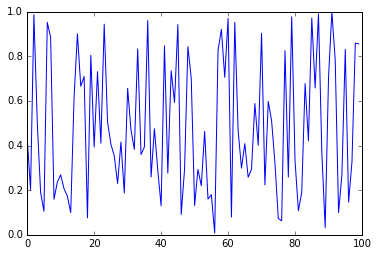

[output:3]

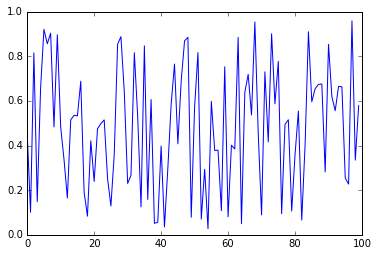

[output:4]

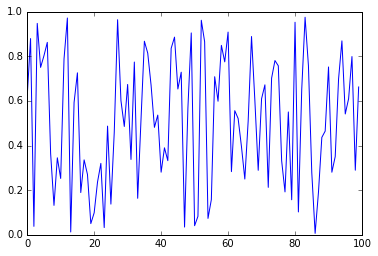

Out[0:5]: [<matplotlib.lines.Line2D at 0x7f93d0b0b4a8>]

Out[1:5]: [<matplotlib.lines.Line2D at 0x7f705afe4390>]

Out[2:5]: [<matplotlib.lines.Line2D at 0x7fea372e1be0>]

Out[3:5]: [<matplotlib.lines.Line2D at 0x7f73cc9c10f0>]

Out[4:5]: [<matplotlib.lines.Line2D at 0x7f3358b8b5c0>]

In [26]:
%pxresult

In [70]:
%%px --targets ::1
   ...: print ("I am even")

<AsyncResult: execute>

In [71]:
%pxresult

[stdout:0] I am even 0
[stdout:1] I am even 0
[stdout:2] I am even 0
[stdout:3] I am even 0
[stdout:4] I am even 0


In [33]:
 %%px --targets 1
   ...: print ("I am number 1")
   ...:

<AsyncResult: finished>

In [34]:
%pxresult

I am number 1


In [35]:
%%px
   ...: print ("still 'all' by default")

<AsyncResult: execute>

In [36]:
%pxresult

[stdout:0] still 'all' by default
[stdout:1] still 'all' by default
[stdout:2] still 'all' by default
[stdout:3] still 'all' by default
[stdout:4] still 'all' by default


In [52]:
view = rc[:]

In [63]:
view.run('hello.py')

<AsyncResult: execute>

In [41]:
! ipcluster stop


2016-03-23 20:20:34.986 [IPClusterStop] Stopping cluster [pid=8296] with [signal=<Signals.SIGINT: 2>]
